<font size = 8> Data Compression with SVD

***

## Libraries & Stuff

In [1]:
import numpy as np

In [ ]:
import torch

In [ ]:
import tensorflow as tf

In [7]:
import matplotlib.pyplot as plt

.DS_Store files

find .  -name ".DS_Store" -depth -exec rm {} \;

In [8]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

In [2]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

***

In [2]:
from PIL import Image

The section features code adapted from [Frank Cleary's](https://gist.github.com/frankcleary/4d2bd178708503b556b0).

In [6]:
# course photo

In [3]:
! wget https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg

--2022-08-08 11:21:07--  https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 419564 (410K) [image/jpeg]
Saving to: 'oboe-with-book.jpg'

oboe-with-book.jpg  100%[===================>] 409.73K  --.-KB/s    in 0.1s    

2022-08-08 11:21:07 (3.12 MB/s) - 'oboe-with-book.jpg' saved [419564/419564]



In [5]:
# my photo uploaded on github

In [4]:
! wget https://github.com/gaurav8936/GN-ML-foundations/blob/main/98.Misc/01.Photo%20-%20ImageCompression%2C%20SVD/2013-04-24%2000.09.25.jpg

--2022-08-08 11:26:52--  https://github.com/gaurav8936/GN-ML-foundations/blob/main/98.Misc/01.Photo%20-%20ImageCompression%2C%20SVD/2013-04-24%2000.09.25.jpg
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: '2013-04-24 00.09.25.jpg'

2013-04-24 00.09.25     [ <=>                ] 136.70K  --.-KB/s    in 0.1s    

2022-08-08 11:26:53 (1.02 MB/s) - '2013-04-24 00.09.25.jpg' saved [139976]



In [11]:
! wget https://github.com/gaurav8936/GN-ML-foundations/blob/main/98.Misc/01.Photo%20-%20ImageCompression%2C%20SVD/sample01.jpg

--2022-08-08 11:29:38--  https://github.com/gaurav8936/GN-ML-foundations/blob/main/98.Misc/01.Photo%20-%20ImageCompression%2C%20SVD/sample01.jpg
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'sample01.jpg'

sample01.jpg            [ <=>                ] 135.93K  --.-KB/s    in 0.1s    

2022-08-08 11:29:38 (1.03 MB/s) - 'sample01.jpg' saved [139194]



***

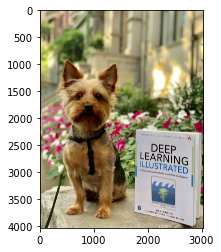

In [23]:
img = Image.open('oboe-with-book.jpg')
_ = plt.imshow(img)

In [20]:
img1 = Image.open('sample01.jpg')

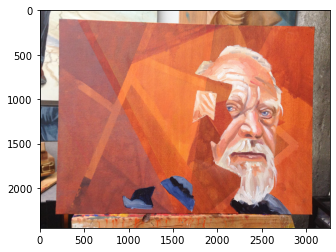

In [21]:
_ = plt.imshow(img)

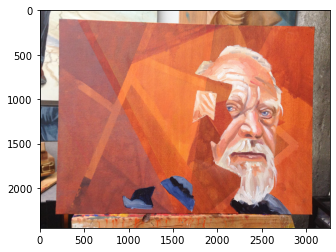

In [22]:
img2 = Image.open('2013-04-24 00.09.25.jpg')
_ = plt.imshow(img)

***

Convert image to grayscale so that we don't have to deal with the complexity of multiple color channels: 

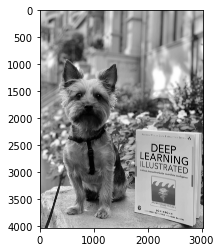

In [24]:
imggray = img.convert('LA')
_ = plt.imshow(imggray)

In [33]:
# this can be considered a 1 dimentional matrix with 400 rows and 3000 columns

# at every element there is a number of how dark or light the point should be

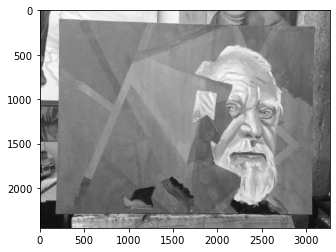

In [29]:
imggray1 = img1.convert('LA')
_ = plt.imshow(imggray1)

In [32]:
# this is a matrix of 2500 rows and 3500 columns

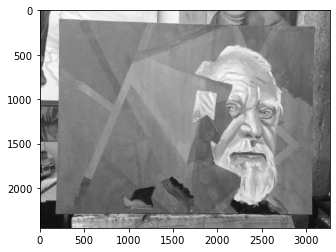

In [30]:
imggray2 = img2.convert('LA')
_ = plt.imshow(imggray2)

***

Convert data into numpy matrix, which doesn't impact image data: 

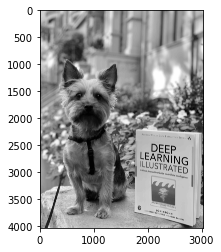

In [34]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

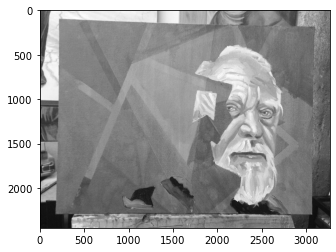

In [35]:
imgmat1 = np.array(list(imggray1.getdata(band=0)), float)
imgmat1.shape = (imggray1.size[1], imggray1.size[0])
imgmat1 = np.matrix(imgmat1)
_ = plt.imshow(imgmat1, cmap='gray')

In [37]:
# this is now a matrix in numpy

***

Calculate SVD of the image: 

In [47]:
# course image

In [38]:
U, sigma, V = np.linalg.svd(imgmat)

In [48]:
# my image

In [46]:
U1, sigma1, V1 = np.linalg.svd(imgmat1)

As eigenvalues are arranged in descending order in diag($\lambda$) so too are singular values, by convention, arranged in descending order in $D$ (or, in this code, diag($\sigma$)). Thus, the first left-singular vector of $U$ and first right-singular vector of $V$ may represent the most prominent feature of the image: 

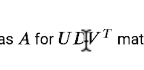

In [39]:
# the first left singular vector of U may represent the most prominent feature

In [40]:
# the first right singular vector of V may represent the most prominent feature

In [41]:
# let us reconstitue teh image based on the two assumptions

In [ ]:
# for the course image

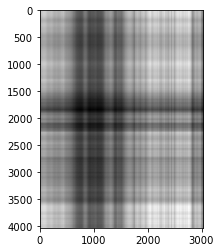

In [42]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

In [ ]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

In [44]:
# for my image

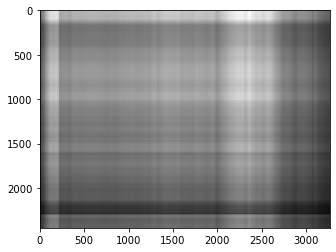

In [49]:
reconstimg1 = np.matrix(U1[:, :1]) * np.diag(sigma1[:1]) * np.matrix(V1[:1, :])
_ = plt.imshow(reconstimg1, cmap='gray')

***

In [50]:
# the above images show that using single vectors is not enough

In [51]:
# add additional vectors

In [52]:
# course image

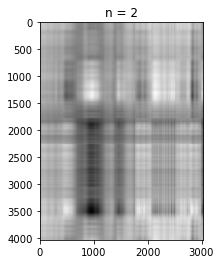

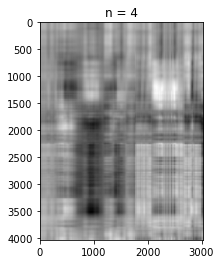

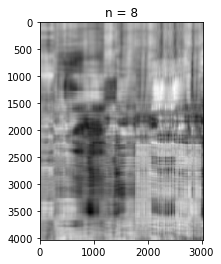

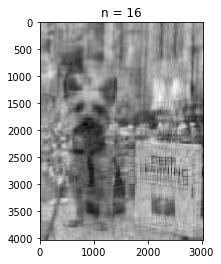

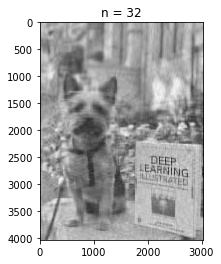

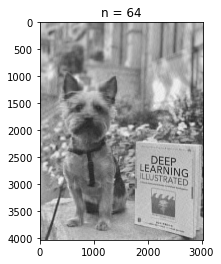

In [53]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

In [56]:
# now you can see the difference when additional singular vectors are added

With 64 singular vectors, the image is reconstructed quite well, however the data footprint is much smaller than the original image:

***

In [54]:
# my image

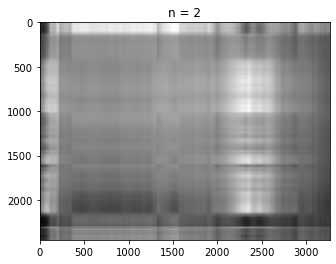

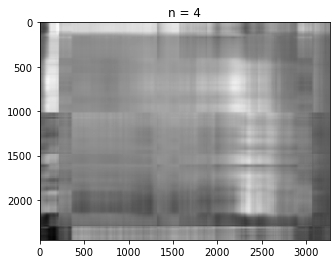

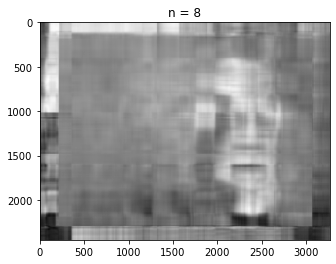

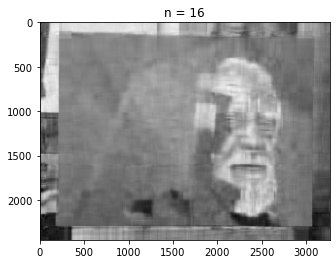

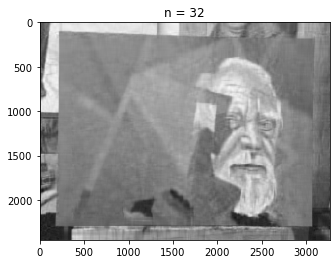

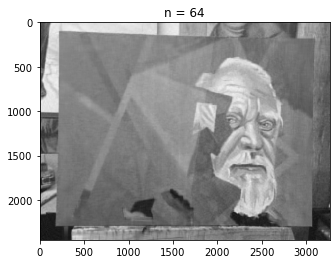

In [55]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg1 = np.matrix(U1[:, :i]) * np.diag(sigma1[:i]) * np.matrix(V1[:i, :])
    plt.imshow(reconstimg1, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

With 64 singular vectors, the image is reconstructed quite well, however the data footprint is much smaller than the original image:

***

In [57]:
# now let us compare image sizes

In [60]:
# course image

In [58]:
imgmat.shape

(4032, 3024)

In [64]:
full_representation = 4032*3024
full_representation

12192768

In [70]:
svd64_rep = 64*4032 + 64 + 64*3024
svd64_rep

451648

In [71]:
svd64_rep/full_representation

0.037042286050222556

In [ ]:
# 3.7%

***

In [61]:
# my image

In [59]:
imgmat1.shape

(2448, 3264)

In [69]:
full_representation1 = 2448*3264
full_representation1

7990272

In [68]:
svd64_rep1 = 64*2448 + 64 + 64*3264
svd64_rep1

365632

In [72]:
svd64_rep1/full_representation1

0.045759643726771757

In [73]:
# 4.5%

***

Specifically, the image represented as 64 singular vectors is 3.7% of the size of the original! 

Alongside images, we can use singular vectors for dramatic, lossy compression of other types of media files.

In [74]:
# can dramatically reduce the requirements for compute